### Hierarchical clustering

##### import libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data=pd.read_csv('shopping_data.csv')
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.shape

(200, 5)

In [4]:
# filtering the columns
data=customer_data.iloc[:,3:5].values

### Run dendrogram based hierarchical clustring

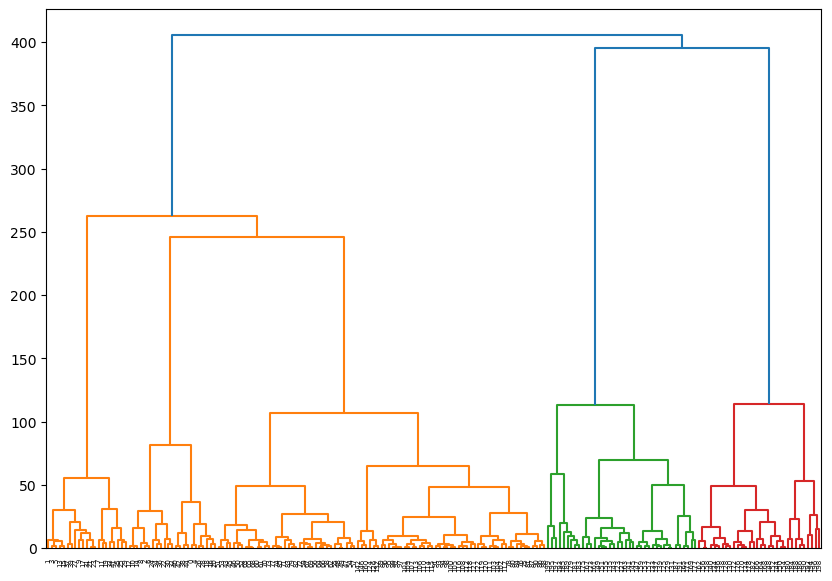

In [10]:
import scipy.cluster.hierarchy as hierarchy
plt.figure(figsize=(10,7))
dend=hierarchy.dendrogram(hierarchy.linkage(data,method='ward'))

# method= 'ward','average', 'single', 'complete'

#### Predict the cluster for the observations

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(data) # unsupervised model: fit and predict apply together 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

### Plot the clusters

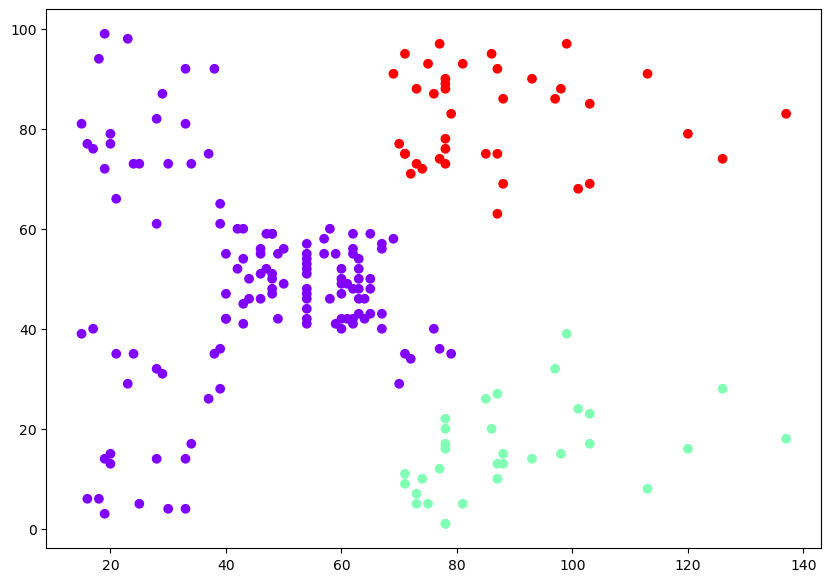

In [14]:
# plot all the points of Annual income and spending score and then shade them by prediction

plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_, cmap='rainbow')

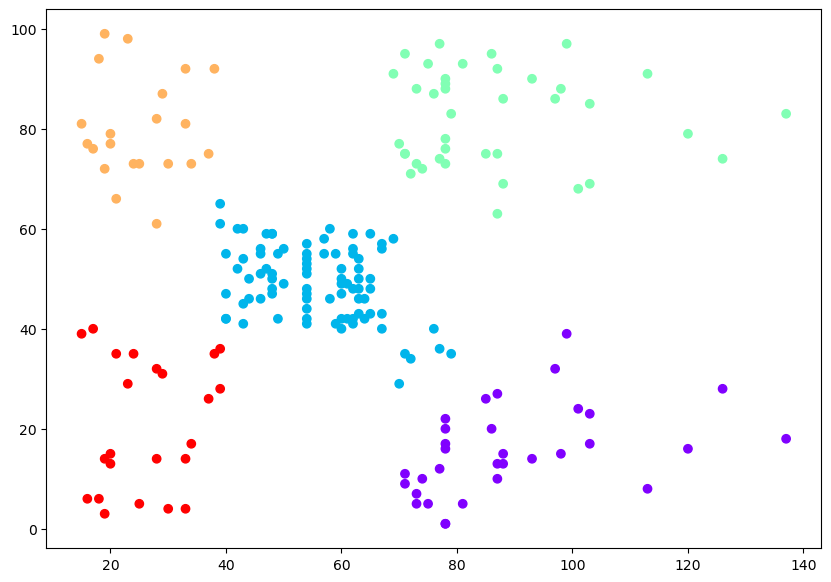

In [15]:
cluster=AgglomerativeClustering(n_clusters=5)
cluster.fit_predict(data)
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_, cmap='rainbow')

## K_means clustering

#### Import libraries and datasets

In [17]:
dataset=pd.read_csv('Cust_Spend_Data.csv')
dataset

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [18]:
dataset1=dataset.iloc[:,1:]
dataset1.head()

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,A,10000,2,1,1,0
1,B,7000,3,0,10,9
2,C,7000,7,1,3,4
3,D,6500,5,1,1,4
4,E,6000,6,0,12,3


## feature scaling

#####
* k-means does not do scaling at the backend on its own.
* In k_means we will have to apply scaling on the entire dataset


In [19]:
data=dataset1.iloc[:,2:6].values  # standardize the data to normal distribution
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dataset1_standardized=ss.fit_transform(data)
dataset1_standardized=pd.DataFrame(dataset1_standardized)

In [20]:
dataset1_standardized

,0,1,2,3
0,-1.240347,1.527525,-0.741433,-1.380131
1,-0.620174,-0.654654,1.280656,1.725164
2,1.860521,1.527525,-0.292080,0.000000
3,0.620174,1.527525,-0.741433,0.000000
4,1.240347,-0.654654,1.730009,-0.345033
5,-0.620174,-0.654654,-0.741433,1.380131
6,0.620174,-0.654654,1.505333,-0.690066
7,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.240347,-0.654654,-0.516756,-0.690066
9,0.000000,-0.654654,-0.741433,1.035098


### WSS plot or elbow curve for Optimal cluster identification

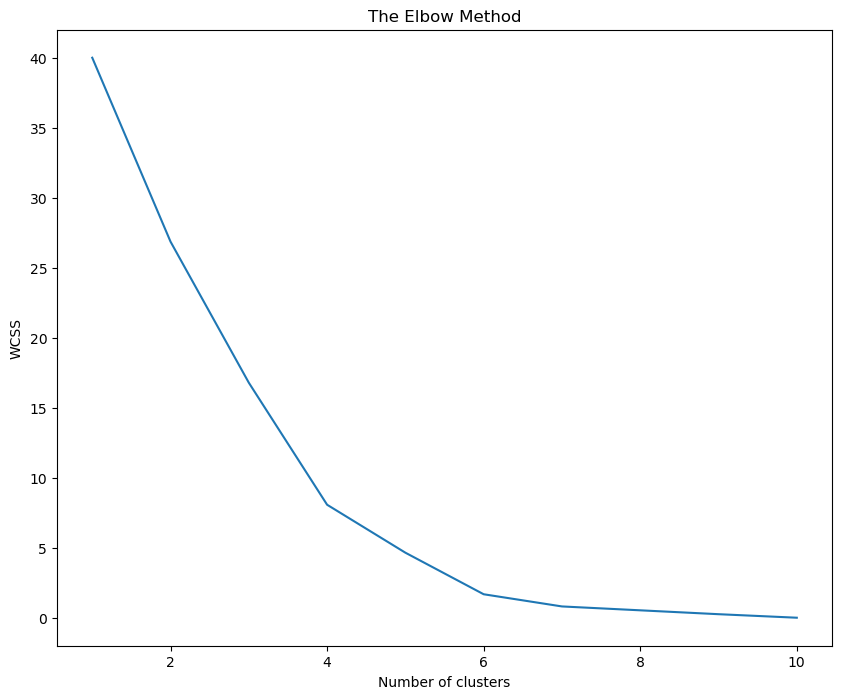

In [22]:
# find the appropriate cluster number
plt.figure(figsize=(10,8))
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the method to calculate within cluster sum of squares
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K-means clustring and cluster information

In [23]:
# fitting k means to the dataset
kmeans=KMeans(n_clusters=4,random_state=42)
y_kmeans=kmeans.fit_predict(dataset1_standardized)
y_kmeans

array([1, 3, 2, 2, 0, 3, 0, 1, 1, 3])

In [24]:
# New datafreme called cluster
cluster=pd.DataFrame(y_kmeans)
# adding cluster to the dataset1
dataset1['cluster']=cluster
dataset1

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,1
1,B,7000,3,0,10,9,3
2,C,7000,7,1,3,4,2
3,D,6500,5,1,1,4,2
4,E,6000,6,0,12,3,0
5,F,4000,3,0,1,8,3
6,G,2500,5,0,11,2,0
7,H,2500,3,0,1,1,1
8,I,2000,2,0,2,2,1
9,J,1000,4,0,1,7,3


In [25]:
#mean of clusters
kmeans_mean_cluster=pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,
0,4250.0,5.5,0.0,11.5,2.5
1,4833.3,2.3,0.3,1.3,1.0
2,6750.0,6.0,1.0,2.0,4.0
3,4000.0,3.3,0.0,4.0,8.0


In [28]:
## observing the first cluster
cluster_0=dataset1[dataset1['cluster']==0]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
4,E,6000,6,0,12,3,0
6,G,2500,5,0,11,2,0


In [29]:
cluster_0.shape

(2, 7)

In [30]:
cluster_0=dataset1[dataset1['cluster']==1]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,1
7,H,2500,3,0,1,1,1
8,I,2000,2,0,2,2,1


In [31]:
cluster_0=dataset1[dataset1['cluster']==3]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
1,B,7000,3,0,10,9,3
5,F,4000,3,0,1,8,3
9,J,1000,4,0,1,7,3


In [33]:
cluster_0=dataset1[dataset1['cluster']==2]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
2,C,7000,7,1,3,4,2
3,D,6500,5,1,1,4,2
